In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_csv_files(directory):
    dataframes = []
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            df['source_file'] = filename.split('_')[0]
            df['category'] = directory  # Hinzufügen der Verzeichnisinformation
            dataframes.append(df)
    return dataframes

# Verzeichnisse definieren
directories = ['Flexi', 'Operative']

# DataFrames aus allen CSV-Dateien in den Verzeichnissen laden
all_dataframes = []
for directory in directories:
    all_dataframes.extend(load_csv_files(directory))

# Beispiel: Anzeigen der ersten Zeilen des ersten DataFrames
if all_dataframes:
    print(all_dataframes)

# Zusammenführen der DataFrames
df = pd.concat(all_dataframes)

# Dataframe als CSV-Datei speichern
df.to_csv('algortihm_comparison.csv', index=False)

[  Instance  Profit  WaitingTime  TotalTasks  Iterations    RunTime  \
0    7_2_1    1042        992.0         356         157  7249.9101   
1    7_5_1    2056       3209.0         802         465  7214.5539   

  source_file category  
0       ISALS    Flexi  
1       ISALS    Flexi  ,   Instance  Profit  WaitingTime  TotalTasks  Iterations    RunTime  \
0    7_2_1    1063       1508.0         358         712  7220.0831   
1    7_5_1    2052       3760.0         790         614  7224.8758   

  source_file category  
0       SAILS    Flexi  
1       SAILS    Flexi  ,   Instance  Profit  WaitingTime  TotalTasks  Iterations    RunTime  \
0    7_2_1    1056       1732.0         357        6193  7206.6366   
1    7_5_1    2053       4552.0         795        5882  7221.6239   

  source_file category  
0         ILS    Flexi  
1         ILS    Flexi  ,   Instance  Profit  WaitingTime  TotalTasks  Iterations    RunTime  \
0    7_2_1     789       4193.0         279         674  7214.6229  

In [35]:
from IPython.display import display, HTML

# DataFrame als HTML-Tabelle anzeigen
display(HTML(df.to_html()))

# Rename colum source_file to Algortihm
df.rename(columns={'source_file': 'Algorithm'}, inplace=True)

,Instance,Profit,WaitingTime,TotalTasks,Iterations,RunTime,source_file,category
0,7_2_1,1042,992.0,356,157,7249.9101,ISALS,Flexi
1,7_5_1,2056,3209.0,802,465,7214.5539,ISALS,Flexi
0,7_2_1,1063,1508.0,358,712,7220.0831,SAILS,Flexi
1,7_5_1,2052,3760.0,790,614,7224.8758,SAILS,Flexi
0,7_2_1,1056,1732.0,357,6193,7206.6366,ILS,Flexi
1,7_5_1,2053,4552.0,795,5882,7221.6239,ILS,Flexi
0,7_2_1,789,4193.0,279,674,7214.6229,SAILS,Operative
1,7_2_2,791,3994.0,281,656,7215.2788,SAILS,Operative
2,7_5_1,1668,9799.0,644,516,7224.8532,SAILS,Operative
3,7_5_2,1666,10526.0,636,508,7217.2019,SAILS,Operative


In [36]:
#Find the maximum 'TotalProfit' for each 'Instance'
max_profit_per_instance_task = df.groupby(['Instance', 'category'])['Profit'].transform('max')
# Calculate RPD
df['RPD'] = ((max_profit_per_instance_task - df['Profit']) / max_profit_per_instance_task) * 100

# df nach Instance und category sortieren
df = df.sort_values(by=['Instance', 'category'])

# mall alles außer Instance, source_file category und RPD löschen
df = df.drop(columns=['WaitingTime', 'TotalTasks', 'Iterations','RunTime'])
df

,Instance,Profit,Algorithm,category,RPD
0,7_2_1,1042,ISALS,Flexi,1.975541
0,7_2_1,1063,SAILS,Flexi,0.000000
0,7_2_1,1056,ILS,Flexi,0.658514
0,7_2_1,789,SAILS,Operative,0.000000
0,7_2_1,788,ILS,Operative,0.126743
0,7_2_1,781,ISALS,Operative,1.013942
1,7_2_2,791,SAILS,Operative,0.000000
1,7_2_2,789,ILS,Operative,0.252845
1,7_2_2,778,ISALS,Operative,1.643489
1,7_5_1,2056,ISALS,Flexi,0.000000


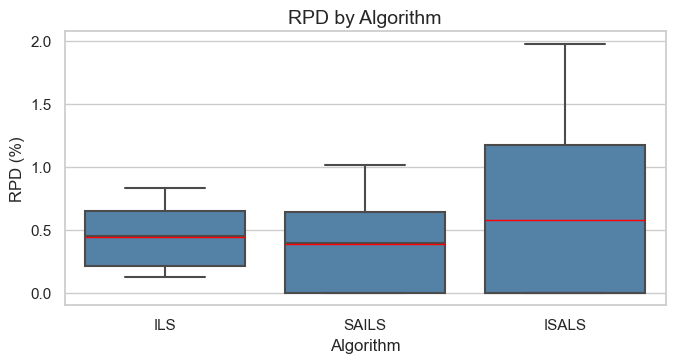

In [37]:
# Assuming 'df' is your DataFrame with the calculated RPD

# Set global plot style to serif font
plt.rcParams["font.family"] = "serif"

# Set seaborn style for whitegrid (can adjust to suit scientific purposes)
sns.set(style="whitegrid")

# Parameters to plot
parameters = ['Algorithm']

# Set a consistent color for all box plots
boxplot_color = "steelblue"

# Define the order of categories for the x-axis
algorithm_order = ['ILS', 'SAILS', 'ISALS']

# Create subplots - one for each parameter
fig, axes = plt.subplots(1, len(parameters), figsize=(7, 4))

# Loop through the parameters and create boxplots in subplots
for i, param in enumerate(parameters):
    sns.boxplot(x=param, y='RPD', data=df, showmeans=True, meanline=True,
                meanprops={"color": "red", "ls": "-", "lw": 1},
                color=boxplot_color, ax=axes, order=algorithm_order)
    
    # Set titles for each subplot
    axes.set_title(f'RPD by {param}', fontsize=14)
    axes.set_xlabel(param, fontsize=12)
    axes.set_ylabel('RPD (%)', fontsize=12)

# Adjust the layout to make space for the overall title
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure as a PNG file
plt.savefig('rpd_box_plots_algortihm_comparison.png', dpi=300)  # Save with high dpi for quality

# Show the plot
plt.show()

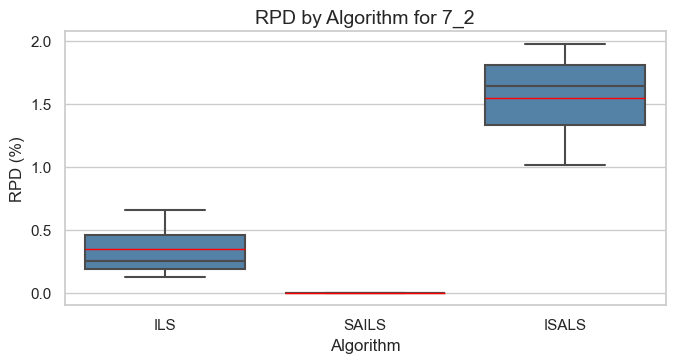

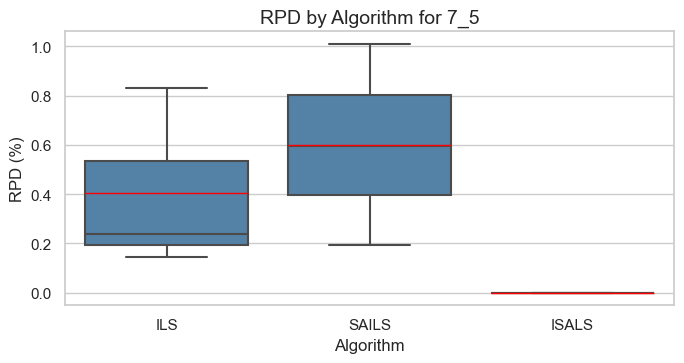

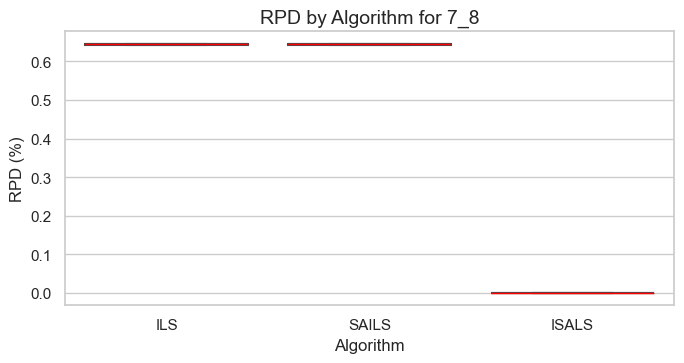

In [38]:
# Define the instance prefixes to filter by
instance_prefixes = ['7_2', '7_5', '7_8']

# Loop through each instance prefix and create a boxplot
for prefix in instance_prefixes:
    filtered_df = df[df['Instance'].str.startswith(prefix)]
    
    # Create subplots - one for each parameter
    fig, axes = plt.subplots(1, len(parameters), figsize=(7, 4))
    
    # Loop through the parameters and create boxplots in subplots
    for i, param in enumerate(parameters):
        sns.boxplot(x=param, y='RPD', data=filtered_df, showmeans=True, meanline=True,
                    meanprops={"color": "red", "ls": "-", "lw": 1},
                    color=boxplot_color, ax=axes, order=algorithm_order)
        
        # Set titles for each subplot
        axes.set_title(f'RPD by {param} for {prefix}', fontsize=14)
        axes.set_xlabel(param, fontsize=12)
        axes.set_ylabel('RPD (%)', fontsize=12)
    
    # Adjust the layout to make space for the overall title
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Save the figure as a PNG file
    plt.savefig(f'rpd_box_plots_algortihm_comparison_{prefix}.png', dpi=300)  # Save with high dpi for quality
    
    # Show the plot
    plt.show()
